# Programming and Scripting Project:
## Analysis of Fisher's Iris data set
*Author: Eoghan Walsh*
***

In [2]:
# Import python modules pandas, matplotlib.pyplot, seaborn and numpy.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Import the Iris data set to a pandas DataFrame and add column headers.
# Adapted from:
# https://sparkbyexamples.com/pandas/pandas-add-header-row-to-dataframe/.
column_names = ("sepal_length_cm", "sepal_width_cm", "petal_length_cm",
                "petal_width_cm", "class")

iris = pd.read_csv("iris.csv", names=column_names)

In [4]:
# 1. OUTPUT A SUMMARY OF EACH VARIABLE TO A SINGLE TEXT FILE.

# Create the filename.
FILENAME = "iris_variable_summary.txt"


# Function to write the summary stats to a text file.
def variable_summary():

    # Generate summary statistics for each variable and convert to string
    # so it can be written to a text file.
    # References:
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html.
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html.
    summary = iris.describe().to_csv()

    # Write summary statistics to txt file.
    with open(FILENAME, "w", newline="") as f:
        f.write(summary)


# Run the function.
variable_summary()

In [5]:
# 2. SAVE A HISTOGRAM OF EACH VARIABLE TO PNG FILES.

# Function to save histograms to png files.
def histogram_png():

    # List of variables for the histograms.
    variables_hist = ("sepal_length_cm", "sepal_width_cm", "petal_length_cm",
                      "petal_width_cm")

    # Subsets of the data set by class.
    setosa_hist = iris["class"] == "Iris-setosa"
    versicolor_hist = iris["class"] == "Iris-versicolor"
    virginica_hist = iris["class"] == "Iris-virginica"

    # For loop to create histogram for each variable.
    for var in variables_hist:

        # Use matplotlib subplots to create the histogram.
        fig, ax = plt.subplots()

        # Select plot type, data, label, bar colour, transparency.
        ax.hist(iris[setosa_hist][var], label="Setosa",
                color="tab:green", alpha=0.5)

        ax.hist(iris[versicolor_hist][var], label="Versicolor",
                color="tab:orange", alpha=0.5)

        ax.hist(iris[virginica_hist][var], label="Virginica",
                color="tab:blue", alpha=0.5)

        # Set the axis labels.
        x_label_hist = var.replace("_", " ").replace("cm", "(in centimetres)")
        ax.set_xlabel(x_label_hist)
        ax.set_ylabel("frequency")

        # Set the title.
        title_hist = var.replace("_", " ").replace(" cm", "s").title()
        ax.set_title(f"Iris {title_hist} per Class")

        # Add legend.
        ax.legend()

        # Save each histogram as png file.
        plt.savefig(f"{var}_hist.png")

        # Close each figure.
        plt.close()


# Run the function.
histogram_png()

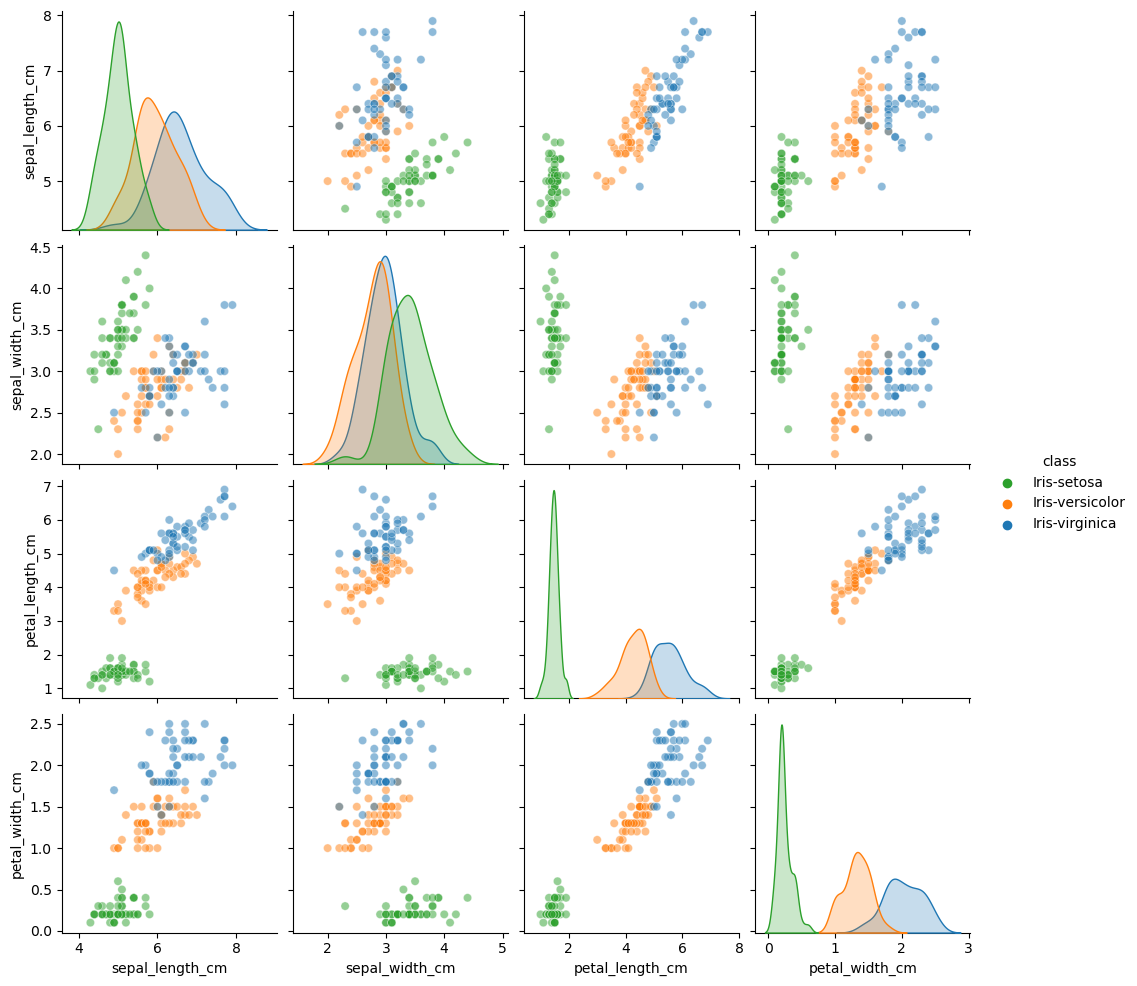

In [6]:
# 3. OUTPUT A SCATTER PLOT OF EACH PAIR OF VARIABLES.

# Funtion to output seaborn pairplot.
def iris_pairplot():

    # Dictionary of colours for the pairplot.
    colours_pairplot = {"Iris-setosa": "tab:green",
                        "Iris-versicolor": "tab:orange",
                        "Iris-virginica": "tab:blue"}
    
    # Filter warnings due to bug:
    # https://github.com/matplotlib/matplotlib/issues/26290.
    import warnings
    warnings.filterwarnings('ignore')

    # Use seaborn pairplot to generate one figure containing all scatter plots
    # for each pair of variables.
    # Adapted from:
    # https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn-pairplot.
    # https://stackoverflow.com/a/47200170
    sns.pairplot(iris, hue="class", palette=colours_pairplot,
                 plot_kws={"alpha": 0.5})
    # Show plot.
    plt.show()


# Run the function.
iris_pairplot()

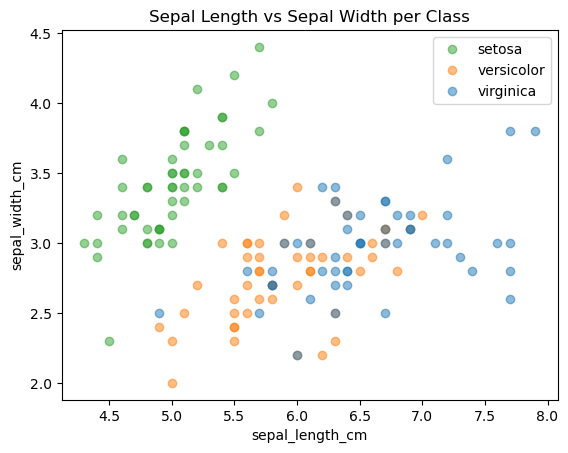

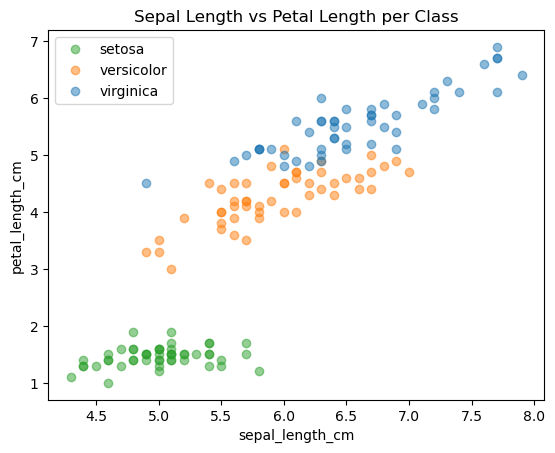

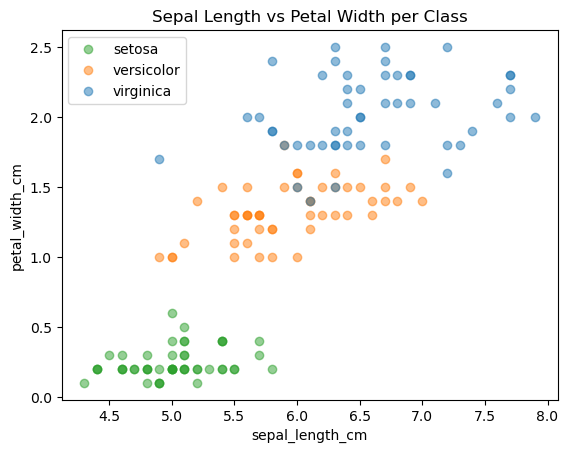

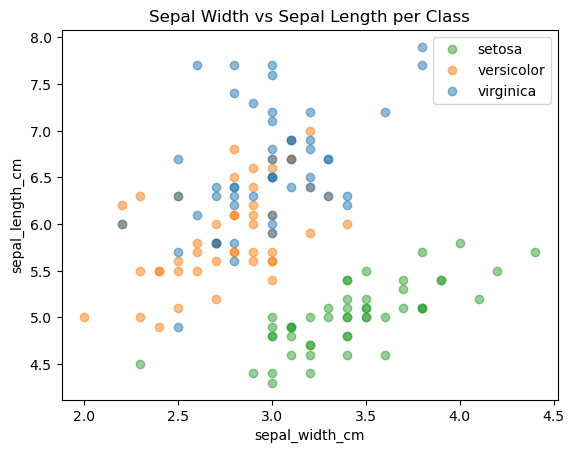

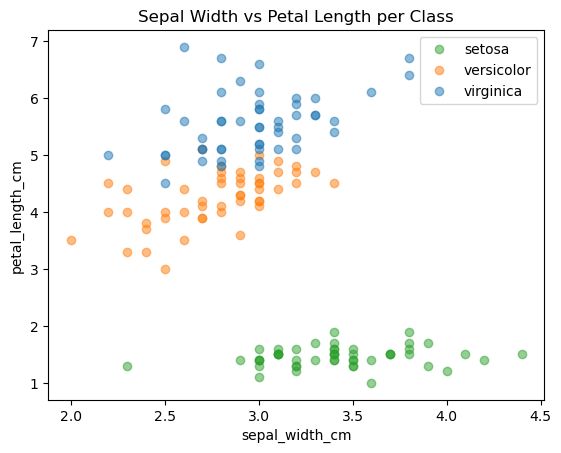

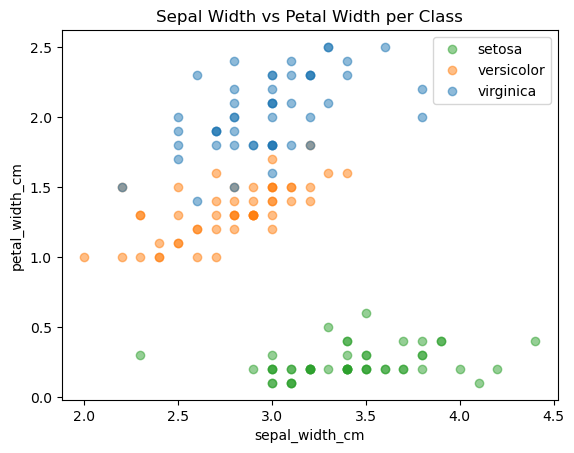

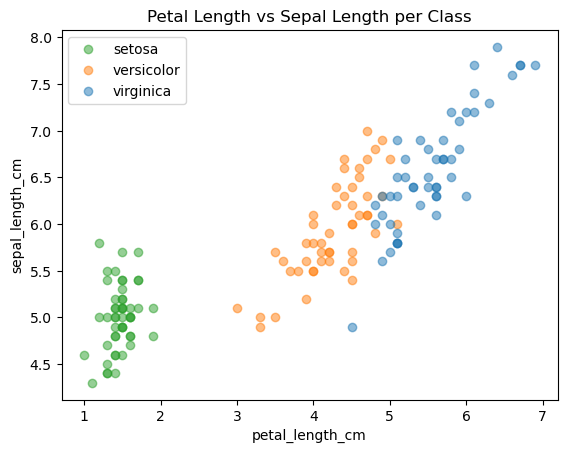

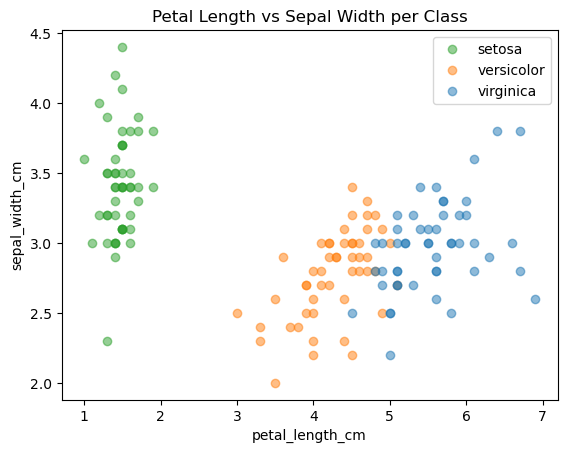

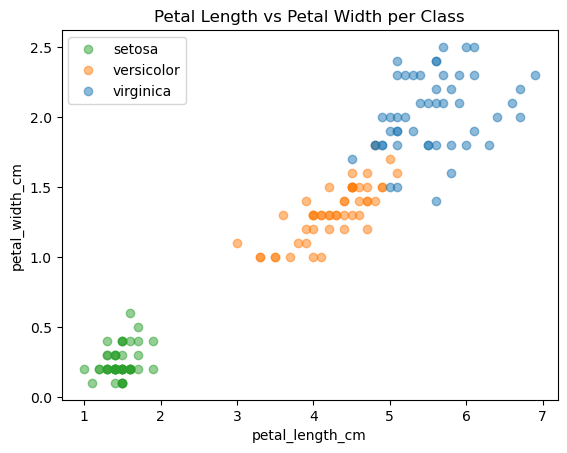

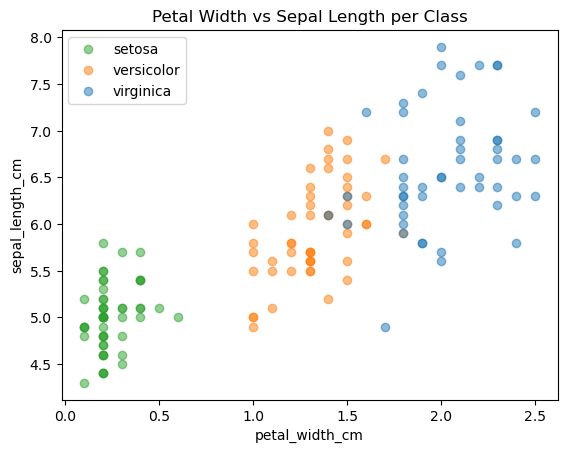

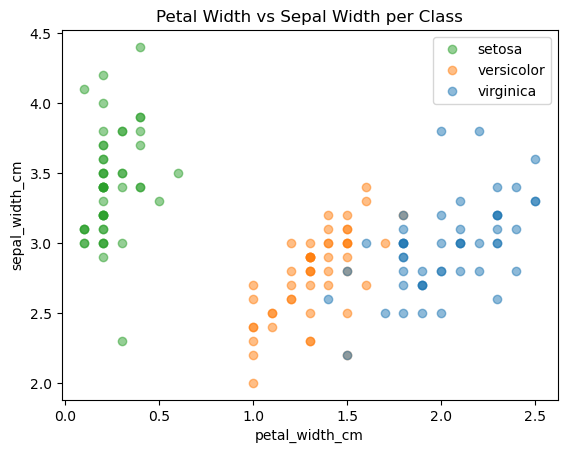

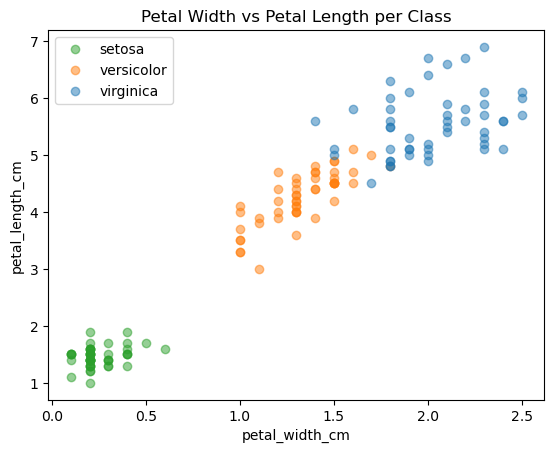

In [7]:
# Funtion to output matplotlib.pyplot plots.
def iris_plots():

    # List of variables for the plots.
    variables_plot = ("sepal_length_cm", "sepal_width_cm",
                      "petal_length_cm", "petal_width_cm")

    # Subsets of the data set by class.
    setosa_plot = iris["class"] == "Iris-setosa"
    versicolor_plot = iris["class"] == "Iris-versicolor"
    virginica_plot = iris["class"] == "Iris-virginica"

    # Nested for loop to run through each pair of variables with
    # continue statement to skip when x equals y. Will generate separate
    # figure for each scatter plot.
    # Reference: https://www.w3schools.com/python/python_for_loops.asp
    for x_var in variables_plot:
        for y_var in variables_plot:
            if x_var == y_var:
                continue
            # Use matplotlib subplots to create the histogram.
            fig, ax = plt.subplots()

            # Select plot type, x & y data, marker shape, label, colour.
            ax.plot(iris[setosa_plot][x_var], iris[setosa_plot][y_var],
                    "o", label="setosa", color="tab:green", alpha=0.5)

            ax.plot(iris[versicolor_plot][x_var], iris[versicolor_plot][y_var],
                    "o", label="versicolor", color="tab:orange", alpha=0.5)

            ax.plot(iris[virginica_plot][x_var], iris[virginica_plot][y_var],
                    "o", label="virginica", color="tab:blue", alpha=0.5)
            # Set the axis labels.
            ax.set_xlabel(x_var)
            ax.set_ylabel(y_var)

            # Set the title.
            x_title_plot = x_var.replace("_", " ").replace(" cm", "").title()
            y_title_plot = y_var.replace("_", " ").replace(" cm", "").title()
            ax.set_title(f"{x_title_plot} vs {y_title_plot} per Class")
            # Add legend.
            ax.legend()

            # Show scatter plots.
            plt.show()


# Run the function.
iris_plots()

Iris dataset variables:
petal_length_cm
petal_width_cm
sepal_length_cm
sepal_width_cm


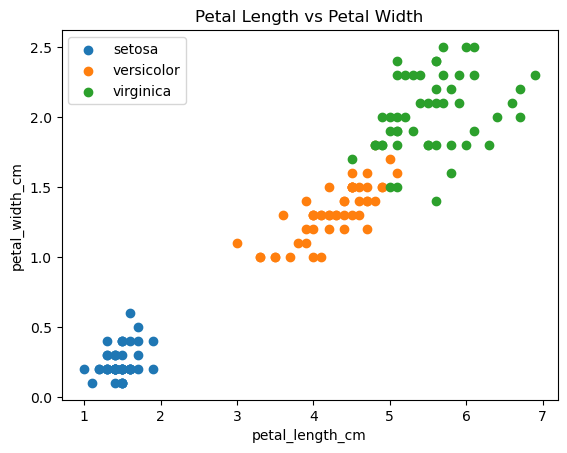

In [9]:
# Function to create scatter plot.


def scatter_plot():

    # User to input variables.
    print("Iris dataset variables:")
    print("petal_length_cm")
    print("petal_width_cm")
    print("sepal_length_cm")
    print("sepal_width_cm")
    x = input("Enter x axis variable from above list: ")
    y = input("Enter y axis variable from above list: ")

    # Subsets of the iris dataset by class.
    setosa = iris["class"] == "Iris-setosa"
    versicolor = iris["class"] == "Iris-versicolor"
    virginica = iris["class"] == "Iris-virginica"

    # Title for scatter plot.
    x_title = (x.replace("_", " ").replace(" cm", "").title())
    y_title = (y.replace("_", " ").replace(" cm", "").title())

    # Creat scatter plot.
    fig, ax = plt.subplots()
    ax.scatter(iris[setosa][x], iris[setosa][y], label="setosa")
    ax.scatter(iris[versicolor][x], iris[versicolor][y], label="versicolor")
    ax.scatter(iris[virginica][x], iris[virginica][y], label="virginica")
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f"{x_title} vs {y_title}")
    ax.legend()

    # Show plot.
    plt.show()


scatter_plot()